In [1]:
import math
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers

print(f"TF version: {tf.__version__}")

TF version: 2.7.0


In [2]:
#Model Functions - from simple to a little more complex
#  each model receives the coordinates of a sample and returns it's class
#  optionaly receives a parameter r used to modify in some way the model

#Almost trivial: class positive if X is positive
def positivos(x, y, r=0):
    return x > r 

#Simple linear: positive if Y > than X 
def linear(x, y):
    return y > x

#A circle: positive if (x,y) is inside a circle of radius r
def circle(x, y, r=0.75):
    return x*x + y*y < r*r

#A ring: positive if (x,y) is inside of a circle of radius r but outside an inner circle or radius r/2
def ring(x, y, r=0.75):
    return (x*x + y*y < r*r) and (x*x + y*y > (r/2)*(r/2))

#A cosine: positive if (x,y) is above a cosine of frequency r
def cos(x, y, r=8):
    return (y) - (math.cos(r*x)) > 0 

#A polar cosine ("rose of n-petals"): Positive if (x,y) is inside the "rose"
def polar(x, y, r=4):
    rr = math.sqrt(x*x + y*y)
    th = math.atan(y / x)
    return rr < math.sin(r * th)

In [3]:
def plot_predictions(points, labels, val_points, val_labels, val_predictions, title=""):
    train_col = ("#add8e6","#4682b4")
    pred_col = ("#ff0000", "#888888")

    plt.figure(figsize=(10,10), dpi=80)
    plt.xlim(-1,1)
    plt.ylim(-1,1)

    p = tf.transpose(points)
    vp = tf.transpose(val_points)

    plt.scatter(p[0], p[1], c=[train_col[i] for i in labels], 
                s=20, alpha=0.7, marker=".", edgecolors="face")
    plt.scatter(vp[0], vp[1], c=[pred_col[i] for i in val_predictions == val_labels], 
                alpha=0.3,marker="o",edgecolors="none")

In [4]:
#Parameters
data_function = positivos
train_size = 10000
val_size = 2000
mlp_units = [1]
epochs = 20
batch_size = 10

points = tf.random.uniform([train_size, 2], -1, 1, dtype=tf.dtypes.float32)
labels = tf.convert_to_tensor([data_function(*e) for e in points.numpy()])

val_points = tf.random.uniform([val_size, 2], -1, 1, dtype=tf.dtypes.float32)
val_labels = tf.convert_to_tensor([data_function(*e) for e in val_points.numpy()])

#This one of the weird thing in TF: the following line takes 14s in Colab, impossible to run in Mac M1
#  for train_size = 10000. 
# Converting to numpy array makes it in < 1s
#labels = tf.convert_to_tensor([data_function(*e) for e in points])

Metal device set to: Apple M1


2022-07-15 18:12:16.834356: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-15 18:12:16.834460: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
def build_model(input_shape, dense_layers, activation="relu"):
    inputs = layers.Input(input_shape, name="INPUT")
    x = inputs
    for index, layer_units in enumerate(dense_layers):
        x = layers.Dense(layer_units, activation=activation, name=f"DENSE_{index}")(x)
    outputs = layers.Dense(1, "sigmoid", name="OUTPUT")(x)
    return keras.Model(inputs, outputs)

model = build_model([2], mlp_units)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 INPUT (InputLayer)          [(None, 2)]               0         
                                                                 
 DENSE_0 (Dense)             (None, 1)                 3         
                                                                 
 OUTPUT (Dense)              (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics="accuracy")

model.fit(x=points, 
          y=labels, 
          validation_data=(val_points, val_labels),
          epochs=epochs, 
          batch_size=batch_size)

Epoch 1/20


2022-07-15 18:12:17.104306: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-15 18:12:17.225258: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1000/1000 [==============================] - ETA: 0s - loss: 0.5304 - accuracy: 0.8709

2022-07-15 18:12:21.319313: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1000/1000 [==============================] - 5s 4ms/step - loss: 0.5304 - accuracy: 0.8709 - val_loss: 0.3975 - val_accuracy: 0.9275
Epoch 2/20
1000/1000 [==============================] - 4s 4ms/step - loss: 0.3035 - accuracy: 0.9559 - val_loss: 0.2403 - val_accuracy: 0.9770
Epoch 3/20
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1915 - accuracy: 0.9887 - val_loss: 0.1614 - val_accuracy: 0.9875
Epoch 4/20
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1318 - accuracy: 0.9973 - val_loss: 0.1165 - val_accuracy: 0.9915
Epoch 5/20
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0958 - accuracy: 0.9979 - val_loss: 0.0875 - val_accuracy: 0.9980
Epoch 6/20
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0722 - accuracy: 0.9995 - val_loss: 0.0684 - val_accuracy: 0.9980
Epoch 7/20
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0563 - accuracy: 0.9986 - val_loss: 0.0556 - val_accuracy: 0.9975
Epo

In [7]:
model.evaluate(val_points, val_labels)

22/63 [=========>....................] - ETA: 0s - loss: 0.0159 - accuracy: 1.0000

2022-07-15 18:13:40.354899: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 0s 5ms/step - loss: 0.0139 - accuracy: 1.0000


[0.013887074775993824, 1.0]

In [8]:
x = labels.numpy()
print(f"Baseline: {(len(x) - sum(x)) / len(x)}")

Baseline: 0.498


2022-07-15 18:13:40.745796: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


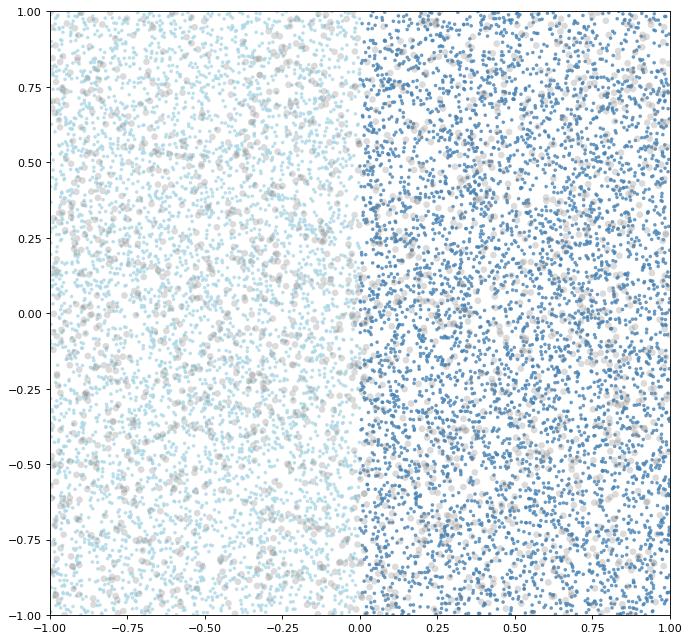

In [9]:
val_predictions = tf.reshape([v > 0.5 for v in model.predict(val_points)], (-1))
plot_predictions(points, labels, val_points, val_labels, val_predictions)

In [13]:
model.layers[1].weights, model.layers[1].bias

([<tf.Variable 'DENSE_0/kernel:0' shape=(2, 1) dtype=float32, numpy=
  array([[-1.2859516e+01],
         [ 8.5471421e-03]], dtype=float32)>,
  <tf.Variable 'DENSE_0/bias:0' shape=(1,) dtype=float32, numpy=array([0.969437], dtype=float32)>],
 <tf.Variable 'DENSE_0/bias:0' shape=(1,) dtype=float32, numpy=array([0.969437], dtype=float32)>)

In [20]:
model.layers[2].weights, model.layers[2].bias

([<tf.Variable 'OUTPUT/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[-6.015799]], dtype=float32)>,
  <tf.Variable 'OUTPUT/bias:0' shape=(1,) dtype=float32, numpy=array([5.69938], dtype=float32)>],
 <tf.Variable 'OUTPUT/bias:0' shape=(1,) dtype=float32, numpy=array([5.69938], dtype=float32)>)

In [14]:
points[:3], labels[:3]

(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.0426898 ,  0.04606271],
        [-0.9239433 , -0.12392879],
        [ 0.58949447, -0.19412732]], dtype=float32)>,
 <tf.Tensor: shape=(3,), dtype=bool, numpy=array([False, False,  True])>)